# Importação das biblioteca e leitura do dataset

**Importando as bibliotecas e lendo o dataset**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler

url= "https://raw.githubusercontent.com/FilipeMussato/dataset/main/Watches.csv"
relogios = pd.read_csv(url)

# Definição dos atributos e hipóteses iniciais

**Perguntas:**

1.   Os produtos mais vendidos são aqueles com maior desconto?
2.   Existe uma relação entre mais vendidos e mais bem avaliados?
3.   Quais as marcas mais vendidas? Como saber as marcas se o dataset não oferece este atributo?
4.   Os produtos com mais avaliações são os melhores avaliados?
5.   Queremos analisar a soma dos itens mais vendidos porém o dataset não nos dá esta informação. Consigo resolver?

**Defininindo cada um dos atributos do Dataset:**



1.   name	- Nome do produto
2.   main_category	- categoria do produto
3.   sub_category	- sub-categoria do produto
4.   image	- Imagem do produto
5.   link	- Link url com endereço do produto
6.   ratings	- Avaliações dadas pelos clientes ao produto comprado
7.   no of ratings	- Número de avaliações dadas pelos clientes a determinado produto
8.   discount_price	- O desconto no preço de cada produto
9.   actual_price	- Preço atual do produto

**Este estudo se trata de um Aprendizado supervisionado**

In [117]:
relogios1 = relogios.copy()

**Comando Head para exibir as primeiras linhas do dataset para verificar se o dataset foi importado com sucesso**

relogios1.head()

**Verificando as últimas linhas do dataset**

In [118]:
relogios1.tail()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
19128,NEUTRON Party Wedding Analog White and Black C...,accessories,Watches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NEUTRON-Party-Wedding-An...,NaN,NaN,₹393,₹914
19129,NEUTRON Gift Analog Green and Brown Color Dial...,accessories,Watches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NEUTRON-Analog-Green-Bro...,Get,FREE Delivery by Amazon,₹520,"₹1,034"
19130,NEUTRON Royal Analog Black and Silver Color Di...,accessories,Watches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NEUTRON-Royal-Analog-Bla...,Get,Only 5 left in stock.,₹431,₹981
19131,NEUTRON Valentine Analog Green and Silver Colo...,accessories,Watches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NEUTRON-Valentine-Analog...,Get,FREE Delivery by Amazon,₹543,"₹1,181"
19132,NEUTRON Fashionable Analog Black and Silver Co...,accessories,Watches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NEUTRON-Fashionable-Anal...,NaN,NaN,₹388,₹900


**Certificando que o arquivo é um dataset**

In [119]:
type(relogios1)

pandas.core.frame.DataFrame

**Verificando o tamanho do dataset (linhas e colunas)**

In [120]:
relogios1.shape

(19133, 9)

**Verificando os tipos de dados dos atributos**

In [121]:
relogios1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            19133 non-null  object
 1   main_category   19133 non-null  object
 2   sub_category    19133 non-null  object
 3   image           19133 non-null  object
 4   link            19133 non-null  object
 5   ratings         9660 non-null   object
 6   no_of_ratings   9660 non-null   object
 7   discount_price  16469 non-null  object
 8   actual_price    18680 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


**Verificando se o dataset tem dados duplicados. O resultado mostra que não há dados duplicados**

In [122]:
relogios1.duplicated().any()

False

**Podemos ver abaixo que nenhuma linha contem todos os valores missing pois o dataset continuou com o mesmo número de linhas mesmo após o código de remoção de linhas que contem todos os valores missing**

In [123]:
print(relogios1.shape)
relogios1 = relogios1.dropna(how='all')
print(relogios1.shape)

(19133, 9)
(19133, 9)


**Verificando se o dataset possui valores Null:**

In [124]:
relogios1.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           9473
no_of_ratings     9473
discount_price    2664
actual_price       453
dtype: int64

**Mostrando graficamente os missings.**

<Axes: >

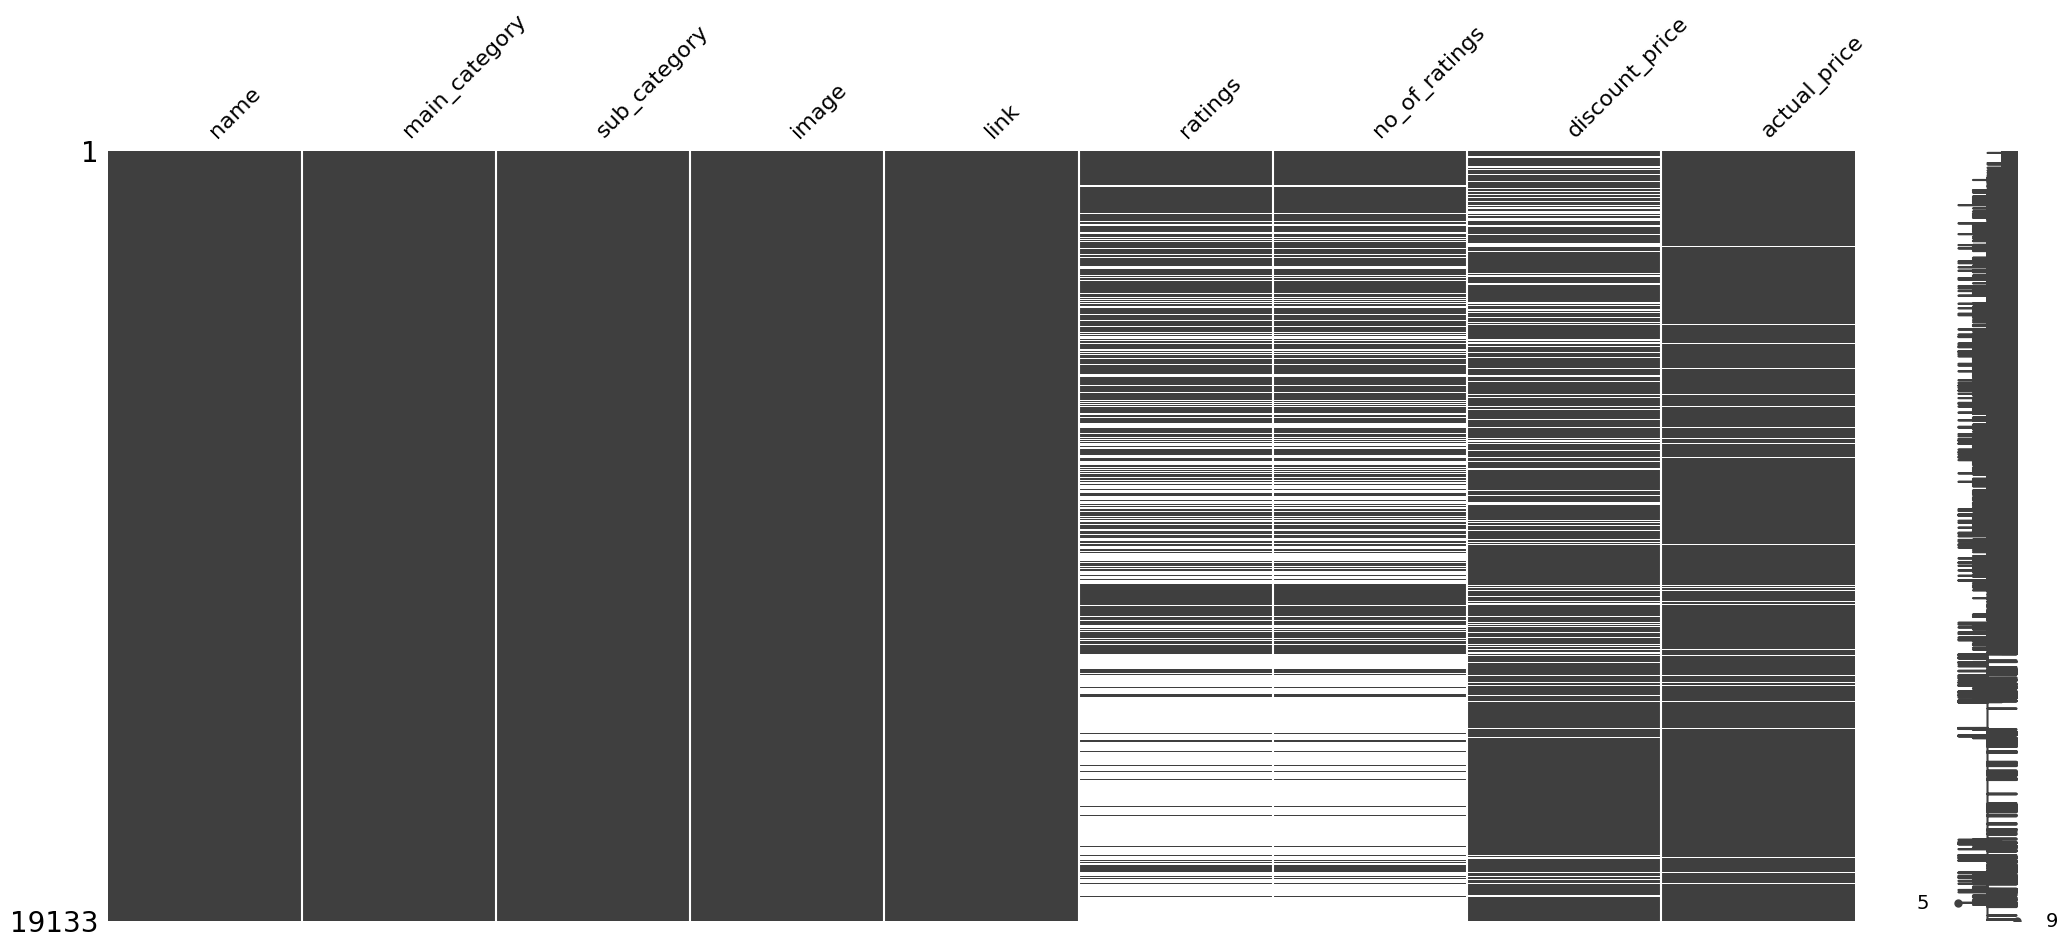

In [125]:
ms.matrix(relogios1)

**Abaixo iremos tratar os valores missings das colunas ratings e no_of_ratings**

**Verificando os valores únicos da coluna "ratings"**

In [126]:
relogios1['ratings'].unique()

array(['3.6', '3.9', '4.5', '4.0', '4.4', '4.2', '3.7', '4.3', '4.1',
       '3.8', '3.4', '3.2', '4.7', '2.9', '3.5', '4.6', '5.0', '3.3',
       '4.8', '3.1', nan, 'Get', '2.8', '2.4', '3.0', '2.6', '4.9', '2.7',
       '1.0', '2.5', '2.0', '1.3', '1.4', '1.6', '2.1', '2.2', '1.9',
       '2.3', '1.7', '1.5', 'FREE', '1.8', '1.2'], dtype=object)

**Nota-se que há valores não numéricos nesta coluna. Vamos guardar os valores não numéricos em uma variável e substituir por 0**

In [127]:
#removendo os valores não numéricos
naonumericos = ['Get', 'FREE']
relogios1['ratings'] = relogios1['ratings'].replace(naonumericos, '0')

#Mudando o tipo de coluna
relogios1['ratings'] = relogios1['ratings'].astype('float')
relogios1['ratings'].dtypes

dtype('float64')

In [128]:
relogios1['ratings'].unique()

array([3.6, 3.9, 4.5, 4. , 4.4, 4.2, 3.7, 4.3, 4.1, 3.8, 3.4, 3.2, 4.7,
       2.9, 3.5, 4.6, 5. , 3.3, 4.8, 3.1, nan, 0. , 2.8, 2.4, 3. , 2.6,
       4.9, 2.7, 1. , 2.5, 2. , 1.3, 1.4, 1.6, 2.1, 2.2, 1.9, 2.3, 1.7,
       1.5, 1.8, 1.2])

**Verificando os valores únicos da coluna no_of_ratings**

In [129]:
relogios1['no_of_ratings'].unique()

array(['3,013', '12,329', '2,796', '5,276', '6,137', '309', '127', '656',
       '7,815', '5,874', '615', '1,169', '1,005', '11,672', '724', '183',
       '97', '130', '3,984', '727', '430', '829', '1,259', '489', '1,801',
       '288', '199', '514', '238', '426', '645', '163', '1,020', '869',
       '4,390', '6,616', '2,228', '935', '587', '1,617', '223', '412',
       '5,070', '957', '106', '631', '139', '429', '2,666', '4,646',
       '924', '597', '721', '2,955', '1,669', '627', '194', '2,849',
       '161', '477', '4', '876', '208', '1,414', '902', '293', '4,263',
       '1,161', '243', '162', '1,865', '3,411', '42', '938', '1,043',
       '8,217', '1,170', '861', '585', '714', '2,462', '226', '7,708',
       '2,817', '634', '5,648', '620', '1,302', '2,074', '500', '244',
       '1,294', '772', '1,319', '3,131', '1,777', '1,222', '1,184', '174',
       '131', '7,710', '1,307', '96', '290', '3,336', '1,716', '185',
       '471', '584', '109', '2,515', '153', '564', '1,554', '626', 

**Removendo vírgulas**

In [130]:
relogios1['no_of_ratings'] = relogios1['no_of_ratings'].replace(',','', regex = True)
relogios1['no_of_ratings'].unique()

array(['3013', '12329', '2796', '5276', '6137', '309', '127', '656',
       '7815', '5874', '615', '1169', '1005', '11672', '724', '183', '97',
       '130', '3984', '727', '430', '829', '1259', '489', '1801', '288',
       '199', '514', '238', '426', '645', '163', '1020', '869', '4390',
       '6616', '2228', '935', '587', '1617', '223', '412', '5070', '957',
       '106', '631', '139', '429', '2666', '4646', '924', '597', '721',
       '2955', '1669', '627', '194', '2849', '161', '477', '4', '876',
       '208', '1414', '902', '293', '4263', '1161', '243', '162', '1865',
       '3411', '42', '938', '1043', '8217', '1170', '861', '585', '714',
       '2462', '226', '7708', '2817', '634', '5648', '620', '1302',
       '2074', '500', '244', '1294', '772', '1319', '3131', '1777',
       '1222', '1184', '174', '131', '7710', '1307', '96', '290', '3336',
       '1716', '185', '471', '584', '109', '2515', '153', '564', '1554',
       '626', '154', '1393', '212', '2702', '146', '60', '1258',

**Encontrando os valores não numéricos**

In [131]:
naonumericos2 = relogios1.loc[~pd.to_numeric(relogios1['no_of_ratings'], errors='coerce').notna(), 'no_of_ratings']

naonumericos2.unique()

array([nan, 'FREE Delivery by Amazon', 'Only 1 left in stock.',
       'Only 4 left in stock.', 'Only 2 left in stock.',
       'Only 3 left in stock.', 'Usually dispatched in 1 to 2 months.',
       'Only 5 left in stock.',
       'This item will be released on August 14 2023.'], dtype=object)

**Substituinto os valores não númericos por 0 e convertendo o tipo de coluna para "float"**

In [132]:
relogios1['no_of_ratings'] = pd.to_numeric(relogios1['no_of_ratings'], errors='coerce').fillna('0')

relogios1['no_of_ratings'] = relogios1['no_of_ratings'].astype('float')
relogios1['no_of_ratings'].dtypes

dtype('float64')

In [133]:
relogios1.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           9473
no_of_ratings        0
discount_price    2664
actual_price       453
dtype: int64

**Como ainda temos 1 missing na coluna link e a mesma não é crucial para análise, iremos remover qualquer linha que contenha valor faltante**

In [134]:
relogios1.dropna(how='any',inplace= True)

In [135]:
relogios1.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

**Para tratar os missings na coluna discount_price vamos precisar converter para números inteiros. Porém não será possível sem antes remover alguns caracters que impossibilitam a transformação**

In [136]:
relogios1['discount_price'].unique()

array(['₹3,495', '₹14,795', '₹6,170', ..., '₹1,255', '₹48,695', '₹5,946'],
      dtype=object)

In [137]:


#Removendo o caracter '₹'
relogios1.loc[relogios1['discount_price'].str.contains('₹')==True, 'discount_price'] = relogios1.loc[relogios1['discount_price'].str.contains('₹')==True, 'discount_price'].apply(lambda x:x.strip('₹'))

#Removendo o caracter ','
relogios1.loc[relogios1['discount_price'].str.contains(',')==True,'discount_price'] = relogios1.loc[relogios1['discount_price'].str.contains(',')==True,'discount_price'].apply(lambda x:x.replace(',',''))
relogios1['discount_price'].unique()


array(['3495', '14795', '6170', ..., '1255', '48695', '5946'],
      dtype=object)

**Encontrando valores não numéricos na colona "discount_price"**

In [138]:
naonumericos2 = relogios1.loc[~pd.to_numeric(relogios1['discount_price'], errors='coerce').notna(), 'discount_price']

**Alterando o tipo de coluna para float**

In [139]:
relogios1['discount_price'] = relogios1['discount_price'].astype('float')
relogios1['discount_price'].dtypes

dtype('float64')

**Veremos abaixo que as 3 colunas tratadas até o momento já estão convertidas em float**

In [140]:
relogios1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 19131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7810 non-null   object 
 1   main_category   7810 non-null   object 
 2   sub_category    7810 non-null   object 
 3   image           7810 non-null   object 
 4   link            7810 non-null   object 
 5   ratings         7810 non-null   float64
 6   no_of_ratings   7810 non-null   float64
 7   discount_price  7810 non-null   float64
 8   actual_price    7810 non-null   object 
dtypes: float64(3), object(6)
memory usage: 610.2+ KB


**Verificando os valores únicos da Coluna 'actual-price'**

In [141]:
relogios1['actual_price'].unique()


array(['₹7,995', '₹18,495', '₹9,495', ..., '₹1,034', '₹981', '₹1,181'],
      dtype=object)

**Removendo os caracteres '₹' e "," da coluna actual_price**

In [142]:
#remove the '₹'
relogios1.loc[relogios1['actual_price'].str.contains('₹')==True, 'actual_price'] = relogios1.loc[relogios1['actual_price'].str.contains('₹')==True, 'actual_price'].apply(lambda x:x.strip('₹'))
relogios1['actual_price'].unique()

#remove the ','
relogios1.loc[relogios1['actual_price'].str.contains(',')==True,'actual_price'] = relogios1.loc[relogios1['actual_price'].str.contains(',')==True,'actual_price'].apply(lambda x:x.replace(',',''))
relogios1['actual_price'].unique()

array(['7995', '18495', '9495', ..., '1034', '981', '1181'], dtype=object)

**Procurando por valores não numéricos**

In [143]:
naonumerico3 = relogios1.loc[~pd.to_numeric(relogios1['actual_price'], errors='coerce').notna(), 'actual_price']
naonumerico3.unique()

array([], dtype=object)

**Alterando o tipo da coluna**

In [144]:
relogios1['actual_price'] = relogios1['actual_price'].astype('float')
relogios1['actual_price'].dtypes

dtype('float64')

**Removendo todas as linhas com "Nan"**

In [145]:
relogios1 = relogios1.dropna(subset = ['ratings', 'actual_price', 'discount_price','no_of_ratings']).reset_index(drop=True)
relogios1.shape

(7810, 9)

**Verificando novamente se as colunas "ratings" , "no_of_ratings", "discount_price" e "actual_price" tiveram seus tipos alterados para float**

In [146]:
relogios1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7810 non-null   object 
 1   main_category   7810 non-null   object 
 2   sub_category    7810 non-null   object 
 3   image           7810 non-null   object 
 4   link            7810 non-null   object 
 5   ratings         7810 non-null   float64
 6   no_of_ratings   7810 non-null   float64
 7   discount_price  7810 non-null   float64
 8   actual_price    7810 non-null   float64
dtypes: float64(4), object(5)
memory usage: 549.3+ KB


**Verificando mais uma vez se resolvemos os problemas de missings**

In [147]:
relogios1.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

**Vamos remover algumas colunas que não terão utilidade para o estudo**

In [148]:
relogios1.drop(['image', 'link'], axis=1, inplace= True)

In [149]:
relogios1.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Fastrack Reflex Play|1.3” AMOLED Display Smart...,accessories,Watches,3.6,3013.0,3495.0,7995.0
1,"Fossil Gen 5E Smartwatch with AMOLED Screen, W...",accessories,Watches,3.9,12329.0,14795.0,18495.0
2,Fossil Analog Rose Gold Dial Women's Watch-BQ3181,accessories,Watches,4.5,2796.0,6170.0,9495.0
3,LOUIS DEVIN LD-L144-BLU-CH Mesh Steel Chain An...,accessories,Watches,4.0,5276.0,289.0,1999.0
4,IMPERIOUS - THE ROYAL WAY Analogue Women's Wat...,accessories,Watches,3.9,6137.0,759.0,1999.0


**Faremos abaixo um resumo estatístico dos dados**

In [150]:
relogios1.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,7810.000000,7810.000000,7810.000000,7810.000000
mean,3.351844,99.028937,2538.339644,4250.975723
std,1.465422,482.721765,4892.703709,6315.435388
min,0.000000,0.000000,118.000000,139.000000
25%,3.000000,1.000000,299.000000,999.000000
50%,3.800000,4.000000,599.000000,1995.000000
75%,4.300000,25.000000,2651.500000,5061.250000
max,5.000000,13838.000000,74617.000000,99617.000000


In [151]:
relogios1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7810 non-null   object 
 1   main_category   7810 non-null   object 
 2   sub_category    7810 non-null   object 
 3   ratings         7810 non-null   float64
 4   no_of_ratings   7810 non-null   float64
 5   discount_price  7810 non-null   float64
 6   actual_price    7810 non-null   float64
dtypes: float64(4), object(3)
memory usage: 427.2+ KB


**Queremos analisar a soma dos relógios mais vendidos, porém o dataset não nos informa quantidade vendida por item. Sendo assim, vamos assumir que cada linha do dataset se equivale a uma unidade vendida, com isso podemos adicionar uma coluna chamada "quantidade" e atribuir, com ajuda do comando FOR, o número 1 para todas as linhas do dataset. Com isso vamos ter 1 unidade vendida para cada item em todo o dataset**

In [152]:
lista = [1]

for item in lista:
    print(item)

relogios1.insert(relogios1_filtered.columns.get_loc("name"), 'quantidade', item)

1


**Transformar os atributos 'ratings', 'no_of_ratings', 'actual_price' e 'discount_price' em números**

In [153]:
#Criando o código para substituir "." em ","
def convert_to_numeric(value):
    if pd.api.types.is_numeric_dtype(value):
        return value
    try:
        return pd.to_numeric(str(value).replace(',', '.'))
    except ValueError:
        return None

#convertendo os atributos em números
relogios1['ratings'] = relogios1['ratings'].apply(convert_to_numeric)
relogios1['no_of_ratings'] = relogios1['no_of_ratings'].apply(convert_to_numeric)
relogios1['discount_price'] = relogios1['discount_price'].apply(convert_to_numeric)
relogios1['actual_price'] = relogios1['actual_price'].apply(convert_to_numeric)
relogios1['quantidade'] = relogios1['quantidade'].apply(convert_to_numeric)

In [154]:
relogios1

,quantidade,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,Fastrack Reflex Play|1.3” AMOLED Display Smart...,accessories,Watches,3.6,3013.0,3495.0,7995.0
1,1,"Fossil Gen 5E Smartwatch with AMOLED Screen, W...",accessories,Watches,3.9,12329.0,14795.0,18495.0
2,1,Fossil Analog Rose Gold Dial Women's Watch-BQ3181,accessories,Watches,4.5,2796.0,6170.0,9495.0
3,1,LOUIS DEVIN LD-L144-BLU-CH Mesh Steel Chain An...,accessories,Watches,4.0,5276.0,289.0,1999.0
4,1,IMPERIOUS - THE ROYAL WAY Analogue Women's Wat...,accessories,Watches,3.9,6137.0,759.0,1999.0
...,...,...,...,...,...,...,...,...
7805,1,NEUTRON Branded Analog Yellow and Black Color ...,accessories,Watches,0.0,0.0,586.0,1260.0
7806,1,NEUTRON 3D Design Analog Green and Silver Colo...,accessories,Watches,0.0,0.0,540.0,1153.0
7807,1,NEUTRON Gift Analog Green and Brown Color Dial...,accessories,Watches,0.0,0.0,520.0,1034.0
7808,1,NEUTRON Royal Analog Black and Silver Color Di...,accessories,Watches,0.0,0.0,431.0,981.0


**Normalizando as colunas Ratings, No_of_ratings, discount_price e actual_price:**

In [155]:
#relogios1['ratings'] = (relogios1['ratings'] - relogios1['ratings'].min()) / (relogios1['ratings'].max() - relogios1['ratings'].min())
#relogios1['no_of_ratings'] = (relogios1['no_of_ratings'] - relogios1['no_of_ratings'].min()) / (relogios1['no_of_ratings'].max() - relogios1['no_of_ratings'].min())
#relogios1['discount_price'] = (relogios1['discount_price'] - relogios1['discount_price'].min()) / (relogios1['discount_price'].max() - relogios1['discount_price'].min())
#relogios1['actual_price'] = (relogios1['actual_price'] - relogios1['actual_price'].min()) / (relogios1['actual_price'].max() - relogios1['actual_price'].min())
#relogios1

#tentei usar, sem sucesso, o minmaxscaler para normalizar os dados. Com o insucesso, normalizei os dados usando o seguinte cálculo:
#y = (x – min) / (max – min)

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar e transformar os dados da coluna 'ratings'
relogios1['ratings_norm'] = scaler.fit_transform(relogios1[['ratings']])
relogios1['no_of_ratings_norm'] = scaler.fit_transform(relogios1[['no_of_ratings']])

# Visualizar o DataFrame resultante
print(relogios1.head())

   quantidade                                               name  \
0           1  Fastrack Reflex Play|1.3” AMOLED Display Smart...   
1           1  Fossil Gen 5E Smartwatch with AMOLED Screen, W...   
2           1  Fossil Analog Rose Gold Dial Women's Watch-BQ3181   
3           1  LOUIS DEVIN LD-L144-BLU-CH Mesh Steel Chain An...   
4           1  IMPERIOUS - THE ROYAL WAY Analogue Women's Wat...   

  main_category sub_category  ratings  no_of_ratings  discount_price  \
0   accessories      Watches      3.6         3013.0          3495.0   
1   accessories      Watches      3.9        12329.0         14795.0   
2   accessories      Watches      4.5         2796.0          6170.0   
3   accessories      Watches      4.0         5276.0           289.0   
4   accessories      Watches      3.9         6137.0           759.0   

   actual_price  ratings_norm  no_of_ratings_norm  
0        7995.0          0.72            0.217734  
1       18495.0          0.78            0.890952  
2 

**Vamos plotar o heatmap para estudar as possíveis correlações entre os atributos. Vamos remover as colunas ratings e no_of_ratings não normalizadas para não atrapalhar a análise**

<ipython-input-156-ad838247ad51>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(relogios1_filtered.corr(), annot=True, cmap='coolwarm', linewidths=.5)


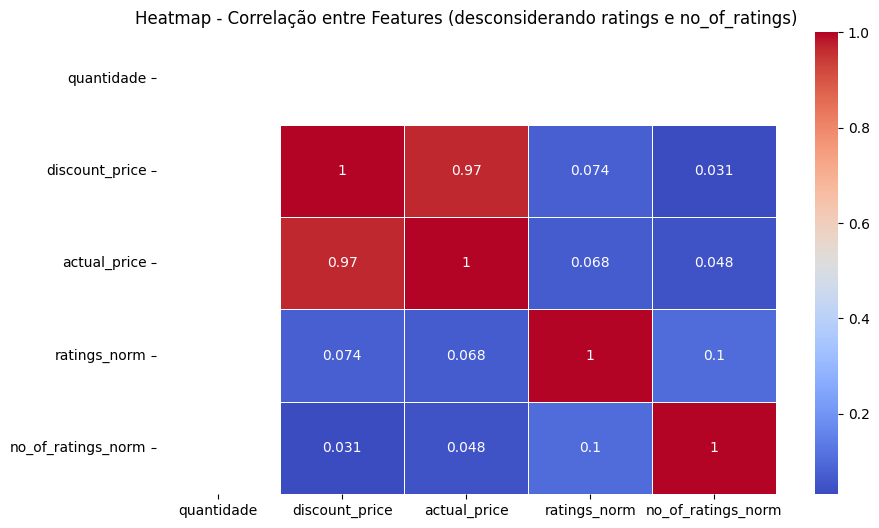

In [156]:
# Remover as colunas 'ratings' e 'no_of_ratings'
relogios1_filtered = relogios1.drop(['ratings', 'no_of_ratings'], axis=1)

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(relogios1_filtered.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap - Correlação entre Features (desconsiderando ratings e no_of_ratings)')
plt.show()

**Tínhamos uma premissa que questionava se os produtos com mais avaliações são os melhores avaliados. O Heatmap nos mostrou que a correlação entre estes dois atributos é praticamente nula**

**Analisando o heatmap, conseguimos observar uma correlação positiva forte entre as colunas "actual_price" e "discount_price". Veremos abaixo que temos uma tendência clara indicando que quanto mais caro o produto, maior será desconto**

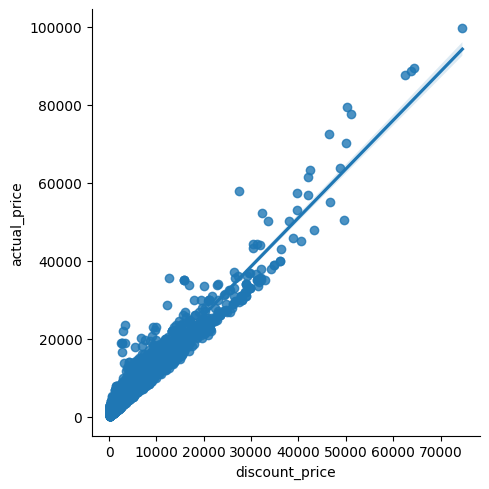

In [157]:
sns.lmplot(x="discount_price",y="actual_price",data=relogios1_filtered)

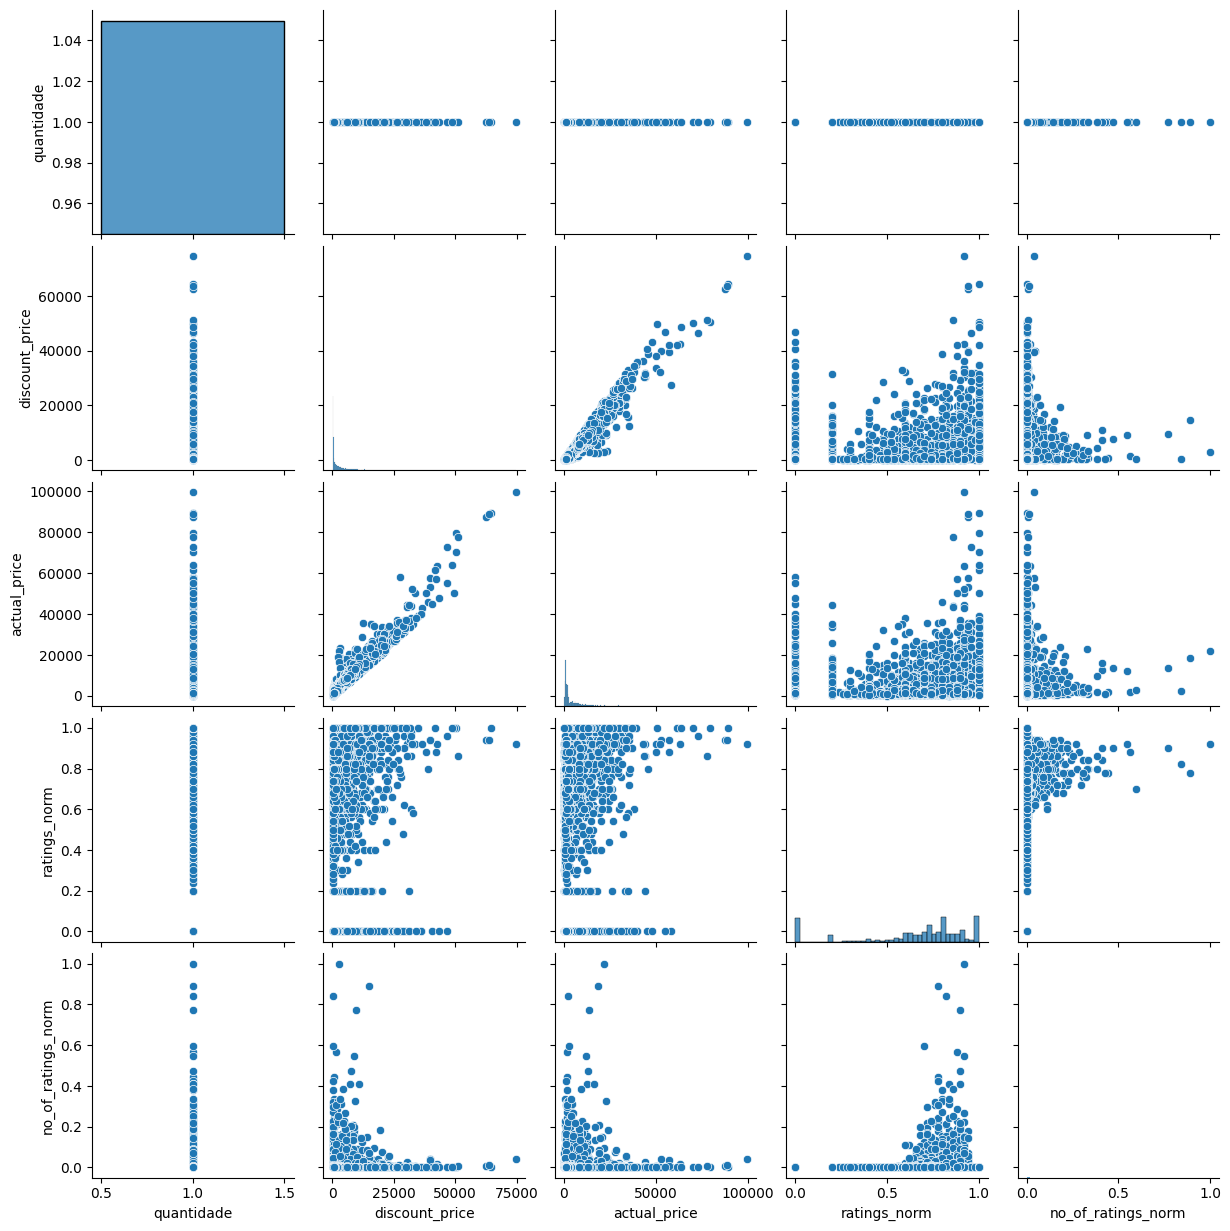

In [158]:
sns.pairplot(relogios1_filtered);

**No plot acima podemos confirmar a correlação preço atual e desconto**

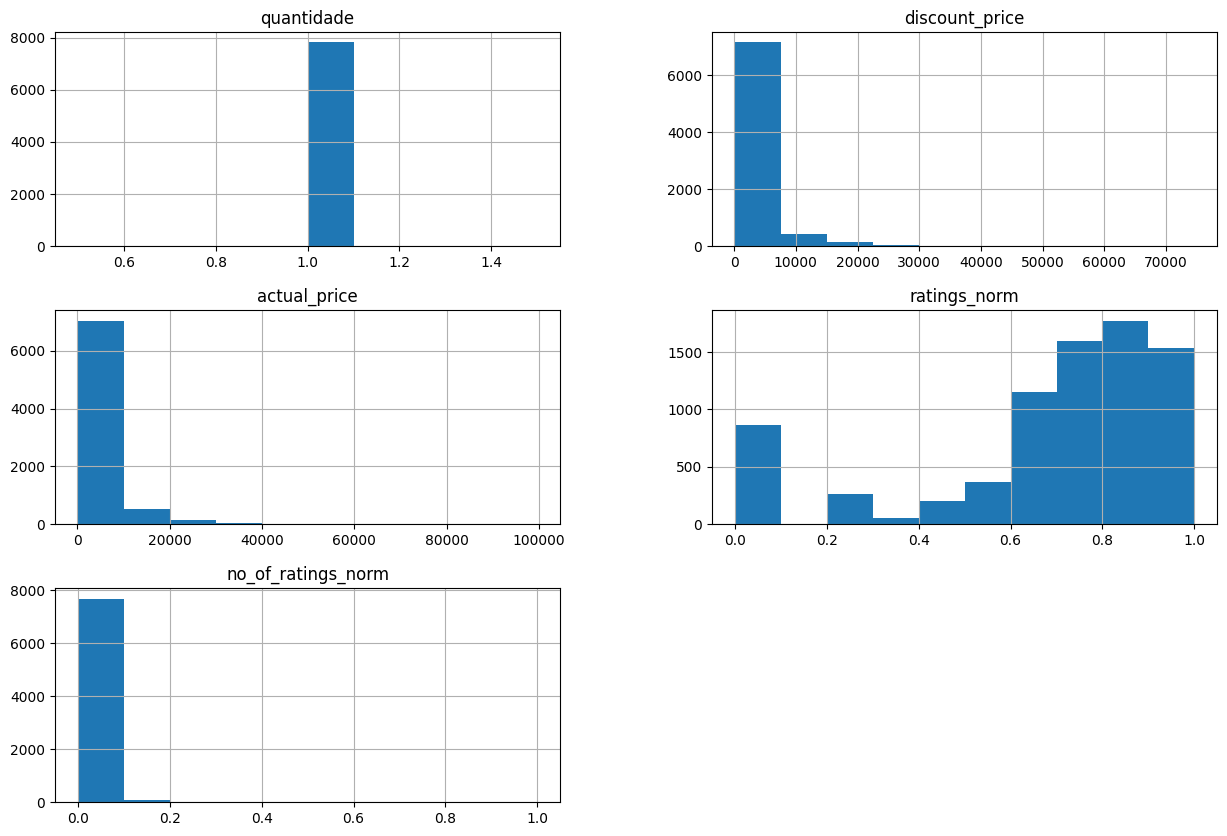

In [159]:
relogios1_filtered.hist(figsize = (15,10))
plt.show()

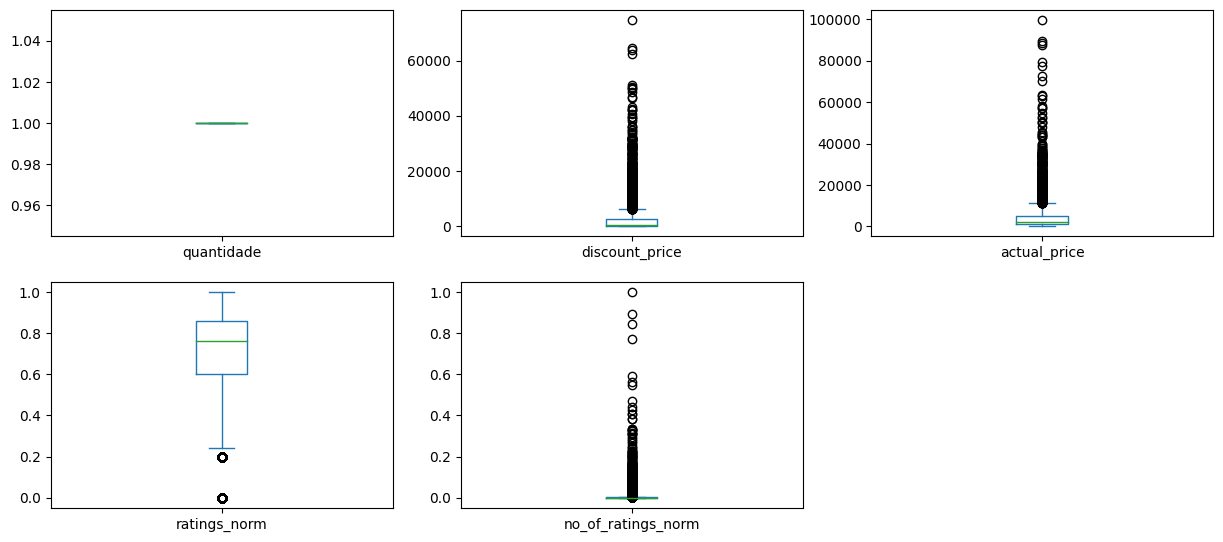

In [160]:
# Boxplot
relogios1_filtered.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

1.   **Analisando o boxplot ratings, podemos concluir que os produtos mal avaliados,ou seja, dentro do intervalo 0 e 0.2 podem ser considerados como outliers, pois estão fora do boxplot**
2.   **Não vamos tratar os outliers evidenciados pois todos se tratam de dados reais. Caso removessemos, por exemplo, os outliers do atributo "actual_price", estaríamos removendo itens HIGH END, ou seja, itens com alto valor agregado que são vendidos e que devem fazer parte da análise**




In [161]:
relogios1_filtered['name'].count

<bound method Series.count of 0       Fastrack Reflex Play|1.3” AMOLED Display Smart...
1       Fossil Gen 5E Smartwatch with AMOLED Screen, W...
2       Fossil Analog Rose Gold Dial Women's Watch-BQ3181
3       LOUIS DEVIN LD-L144-BLU-CH Mesh Steel Chain An...
4       IMPERIOUS - THE ROYAL WAY Analogue Women's Wat...
                              ...                        
7805    NEUTRON Branded Analog Yellow and Black Color ...
7806    NEUTRON 3D Design Analog Green and Silver Colo...
7807    NEUTRON Gift Analog Green and Brown Color Dial...
7808    NEUTRON Royal Analog Black and Silver Color Di...
7809    NEUTRON Valentine Analog Green and Silver Colo...
Name: name, Length: 7810, dtype: object>

In [162]:
#Criando o código para substituir "." em ","
def convert_to_numeric(value):
    if pd.api.types.is_numeric_dtype(value):
        return value
    try:
        return pd.to_numeric(str(value).replace(',', '.'))
    except ValueError:
        return None

#convertendo os atributos em números
relogios1_filtered['quantidade'] = relogios1_filtered['quantidade'].apply(convert_to_numeric)

In [163]:
relogios1_filtered['quantidade'] = relogios1_filtered['quantidade'].astype('float')

**Vamos identificar o relógio mais vendidos.**
**O relógio mais vendido é o French Connection Analog Dial Women's Watch com 42 vendas**

In [164]:
# Agrupar por nome e somar as quantidades
total_vendido = relogios1_filtered.groupby('name')['quantidade'].sum().reset_index()

# Ordenar em ordem decrescente
total_vendido = total_vendido.sort_values(by='quantidade', ascending=False)

# Pegar o item mais vendido
mais_vendido = total_vendido.iloc[0]

print("Item mais vendido:", mais_vendido['name'])
print("Quantidade vendida:", mais_vendido['quantidade'])

Item mais vendido: French Connection Analog Dial Women's Watch
Quantidade vendida: 42.0


**Agora vamos plotar um gráfico com os 10 relógios mais vendidos**

<ipython-input-165-91ad120a26c6>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


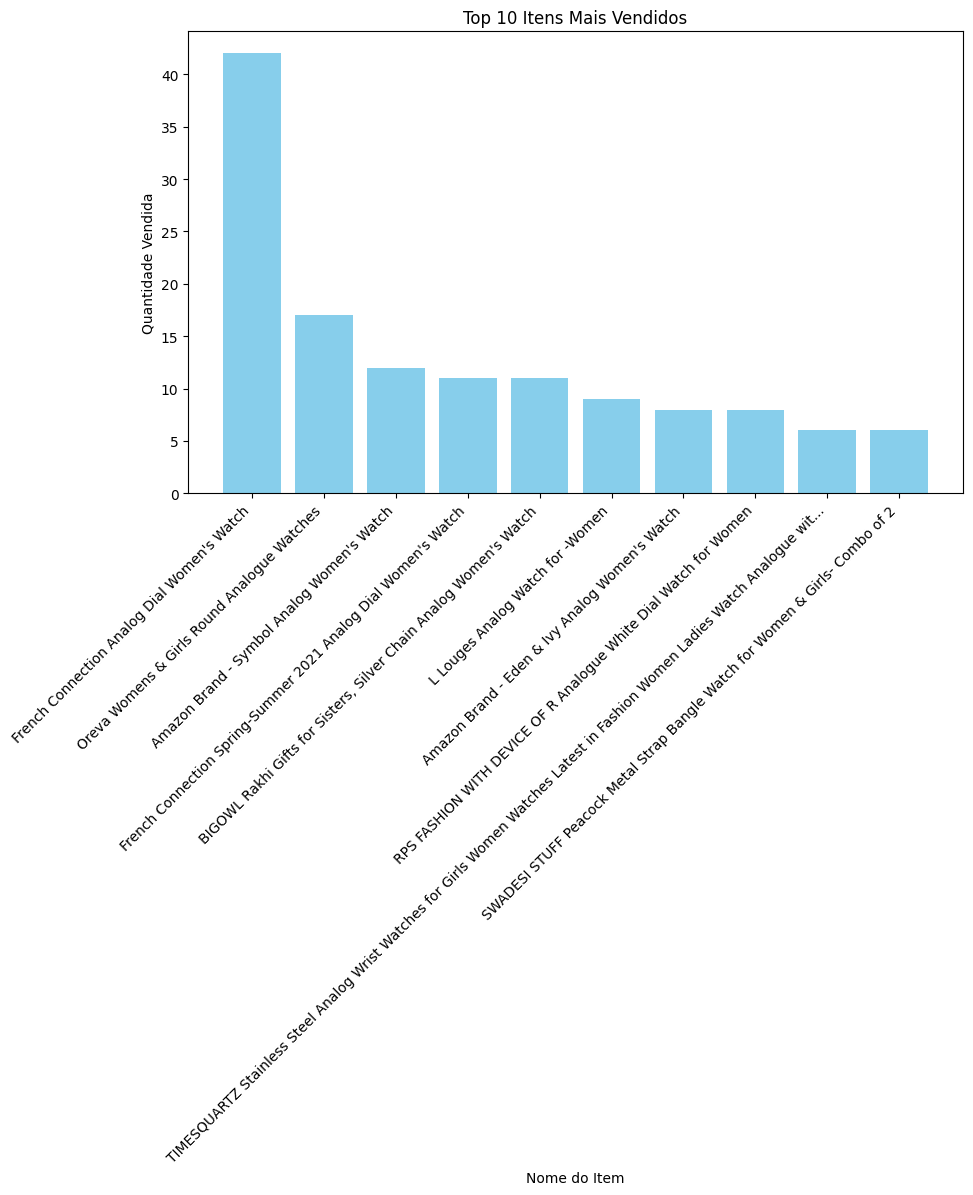

In [165]:
# Agrupar por nome e somar as quantidades
total_vendido = relogios1_filtered.groupby('name')['quantidade'].sum().reset_index()

# Ordenar em ordem decrescente
total_vendido = total_vendido.sort_values(by='quantidade', ascending=False)

# Pegar os top 10 mais vendidos
top_10 = total_vendido.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['quantidade'], color='skyblue')
plt.title('Top 10 Itens Mais Vendidos')
plt.xlabel('Nome do Item')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Mostrar o gráfico
plt.show()

**Abaixo vamos plotar um gráfico relacionado 3 atributos. Sendo eles: quantidade, name e ratings. O objetivo é verificar as médias de avaliações dos 10 itens mais vendidos e ter insights à partir disso.**
**Observação: Não precisaremos da coluna ratings normalizada para este gráfico. Por isso, chamaremos o dataset original para plotar**

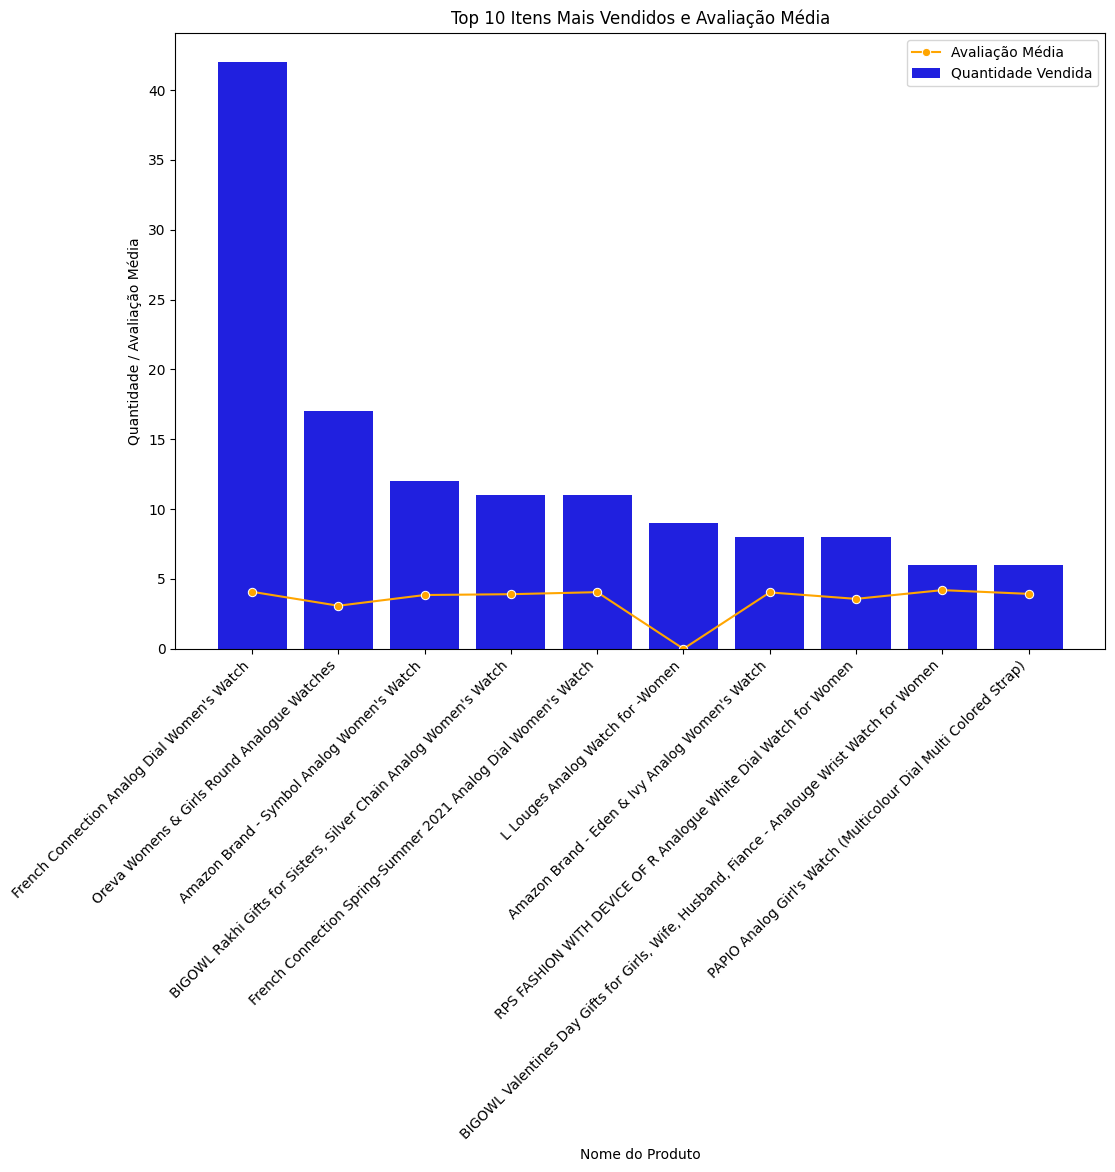

In [190]:
# Agrupar por produto e somar as quantidades
quantidade_por_produto = relogios1.groupby('name')['quantidade'].sum().reset_index()

# Filtrar os 10 itens mais vendidos
top_10_items = quantidade_por_produto.nlargest(10, 'quantidade')

# Calcular a média das avaliações normalizadas por produto
media_avaliacoes = relogios1.groupby('name')['ratings'].mean().reset_index()

# Merge dos DataFrames para obter as informações necessárias
dados_para_grafico = pd.merge(top_10_items, media_avaliacoes, on='name', how='left')

# Plotar o gráfico de barras e linhas
plt.figure(figsize=(12, 8))

# Barras para a quantidade vendida
sns.barplot(x='name', y='quantidade', data=dados_para_grafico, color='blue', label='Quantidade Vendida')

# Linhas para a avaliação média normalizada
sns.lineplot(x='name', y='ratings', data=dados_para_grafico, marker='o', color='orange', label='Avaliação Média')

plt.xlabel('Nome do Produto')
plt.ylabel('Quantidade / Avaliação Média')
plt.title('Top 10 Itens Mais Vendidos e Avaliação Média')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.legend()
plt.show()

**Podemos notar que a maioria dos top 10 relógios vendidos são produtos bem avaliados. Porém saltou aos olhos o relógio "L Louges Analog Watch for -Women" que está com média nota 0 nas avaliações dadas pelos clientes. Analisaremos este relógio à parte na sequência**

**Antes de ter uma idéia concreta sobre a qualidade do relógio "L Louges Analog Watch for -Women", vamos exibir todas as avaliações dadas pelos clientes para este item**

In [206]:
# Filtrar linhas onde a coluna 'name' é igual a "L Louges Analog Watch for -Women"
filtro_nome = relogios1['name'] == "L Louges Analog Watch for -Women"
relogios_filtrados = relogios1[filtro_nome]

# Agora, obtenha as informações da coluna 'ratings' para todas as linhas filtradas
ratings_filtrados = relogios_filtrados['ratings']

# Imprima as informações
print(f"Informações para 'L Louges Analog Watch for -Women':")
print(ratings_filtrados)

Informações para 'L Louges Analog Watch for -Women':
7788    0.0
7789    0.0
7790    0.0
7791    0.0
7792    0.0
7793    0.0
7794    0.0
7795    0.0
7796    0.0
Name: ratings, dtype: float64


**Vimos acima que todos os clientes deram nota 0 para o relógio "L Louges Analog Watch for -Women". Esta informação nos mostra duas posibilidades, sendo elas:**


1.   O produto não tem qualidade. Assumindo isto como verdade, seria um insight interessante que o cientista de dados poderia compartilhar com o time comercial para eventual tomada de decisões, como por exemplo, tirar o item do catálogo e buscar itens semelhantes que possam ser vendidos no lugar , mas que tenham uma boa qualidade visando boa reputação da loja.
2.   Os dados de avaliações deste item estão incorretos. Neste cenário, o cientista de dados poderia buscar outras fontes de dados para tentar descobrir os dados corretos.

**para fins acadêmicos, consideremos estas duas análises como válidas.**

